<a href="https://colab.research.google.com/github/rddaz2013/1m3_newTDMS/blob/main/Read_TDMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install npTDMS==1.2 --force-reinstall

Processing /root/.cache/pip/wheels/57/6c/c7/77f414d5c81491af25cf56d2511651b63f87f36300f74c44f0/npTDMS-1.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a5/42/560d269f604d3e186a57c21a363e77e199358d054884e61b73e405dd217c/numpy-1.20.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Found existing installation: npTDMS 1.2.0
    Uninstalling npTDMS-1.2.0:
      Successfully uninstalled npTDMS-1.2.0


In [2]:
import nptdms as tts
tts.__version__

'1.2.0'

In [3]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.3, rc={'lines.linewidth': 3.0})
import numpy as np

plt.rcParams['figure.figsize'] = (10,10/1.6)

# Einlesen der tdms Datei
# Wichtig wegen der Speicherung der Gruppen und der Zeitachse kann es nicht direkt als Dataframe in
# pandas geladen werden
from nptdms import TdmsFile
tdms_file = TdmsFile("Test.tdms")

In [4]:
print (tdms_file)

In [5]:
gf1 = (tdms_file.groups()[0])
for dummy in tdms_file[gf1.name].channels():
    print (dummy)

<TdmsChannel with path /'Sensoren'/'Ai 0 = Keller 1'>
<TdmsChannel with path /'Sensoren'/'Ai 0 = Keller 2'>
<TdmsChannel with path /'Sensoren'/'Ai 2 = Keller 3'>
<TdmsChannel with path /'Sensoren'/'Ai 3 = Keller 4'>
<TdmsChannel with path /'Sensoren'/'Ai 4 = IR 1'>
<TdmsChannel with path /'Sensoren'/'Ai 5 = IR 2'>


In [6]:
all_groups=tdms_file[gf1.name].channels()
channel = all_groups[0]
timestamp = channel.properties['wf_start_time']
timestep = channel.properties['wf_increment']

time_array = np.arange(start=0, stop=np.size(channel))
time_array=time_array*timestep
channel_data = channel.data

In [7]:
zeit=all_groups[0].data 
AIN0= all_groups[0].data
AIN1= all_groups[1].data
AIN2= all_groups[2].data

print (np.size(all_groups[0]))

53400


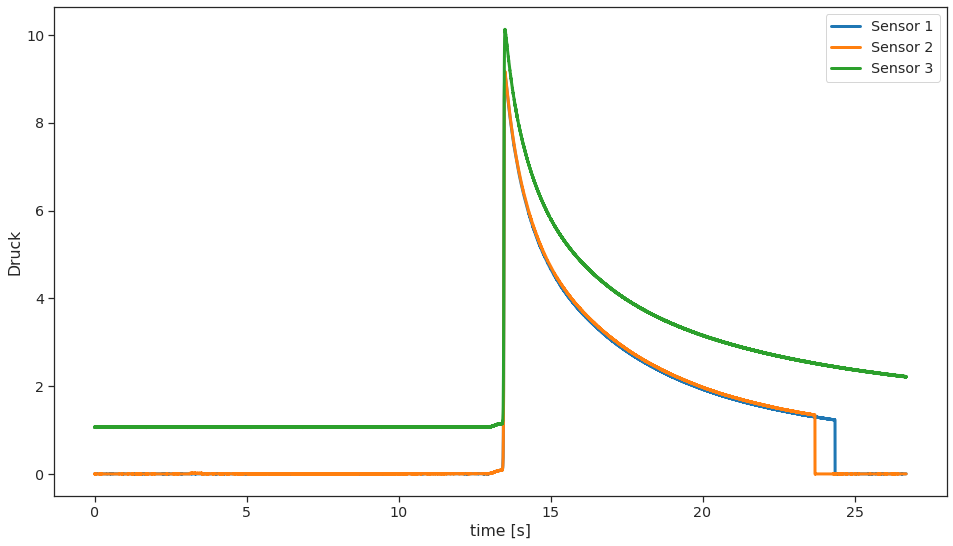

In [8]:
from scipy import signal

# Positionierung
pt=slice(1,3000) # Zeitskala ist * 0.1s
plt.figure(figsize=(16,9))
plt.plot(time_array,AIN0,label='Sensor 1')
plt.plot(time_array,AIN1,label='Sensor 2')
plt.plot(time_array,AIN2,label='Sensor 3')
plt.xlabel('time [s]')
plt.ylabel('Druck')
plt.legend()
plt.show()